In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

In [2]:
glove_model_path = './data/glove.6B.100d.txt'
wvec_out_file = glove_model_path + '.word2vec'

In [ ]:

from gensim.scripts.glove2word2vec import glove2word2vec


glove2word2vec(glove_model_path, wvec_out_file)

In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(wvec_out_file, binary=False)

In [8]:
model.get_vector('king')

print(model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))

[('queen', 0.7698540687561035)]


In [9]:
print(model.most_similar(positive=['football'], topn=5))

[('soccer', 0.8732221722602844), ('basketball', 0.8555637001991272), ('league', 0.815336287021637), ('rugby', 0.8007532954216003), ('hockey', 0.7833694815635681)]


In [10]:

from typing import List
from gensim.models.keyedvectors import KeyedVectors as KeyedVectorsT

def get_word_vecs(model:KeyedVectorsT, words: List[str]):
    vecs = np.empty((0, model.vector_size), dtype='f')
    labels = []

    for w in words:
        vecs = np.append(vecs, np.array([model[w]]), axis=0)
        labels.append(w) # store each vector and its label

        similar_ws = model.similar_by_word(w, topn=5)
        
        for sim_w, _ in similar_ws:
            # print(np.array(model[sim_w]).shape, 'and', vecs[0].shape)
            vecs = np.append(vecs, np.array([model[sim_w]]), axis=0)
            labels.append(sim_w)
    
    return vecs, labels


def plot_graph(points, labels: List[str]):
    x_crd, y_crd = points[:, 0], points[:, 1]

    plt.figure(figsize=(20,20))
    plt.scatter(x_crd, y_crd)

    for label, x, y in zip(labels, x_crd, y_crd):
        plt.annotate(label, xy=(x,y),  xytext=(5, 2), textcoords='offset points')
    
    plt.xlim(x_crd.min()+0.00005, x_crd.max()+0.00005)
    plt.ylim(y_crd.min()+0.00005, y_crd.max()+0.00005)
    plt.show()



In [11]:
def plot_closest_tsne(model: KeyedVectorsT, words):
    vecs, labels = get_word_vecs(model, words)

    tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=2)
    points = tsne.fit_transform(vecs)

    plot_graph(points, labels)

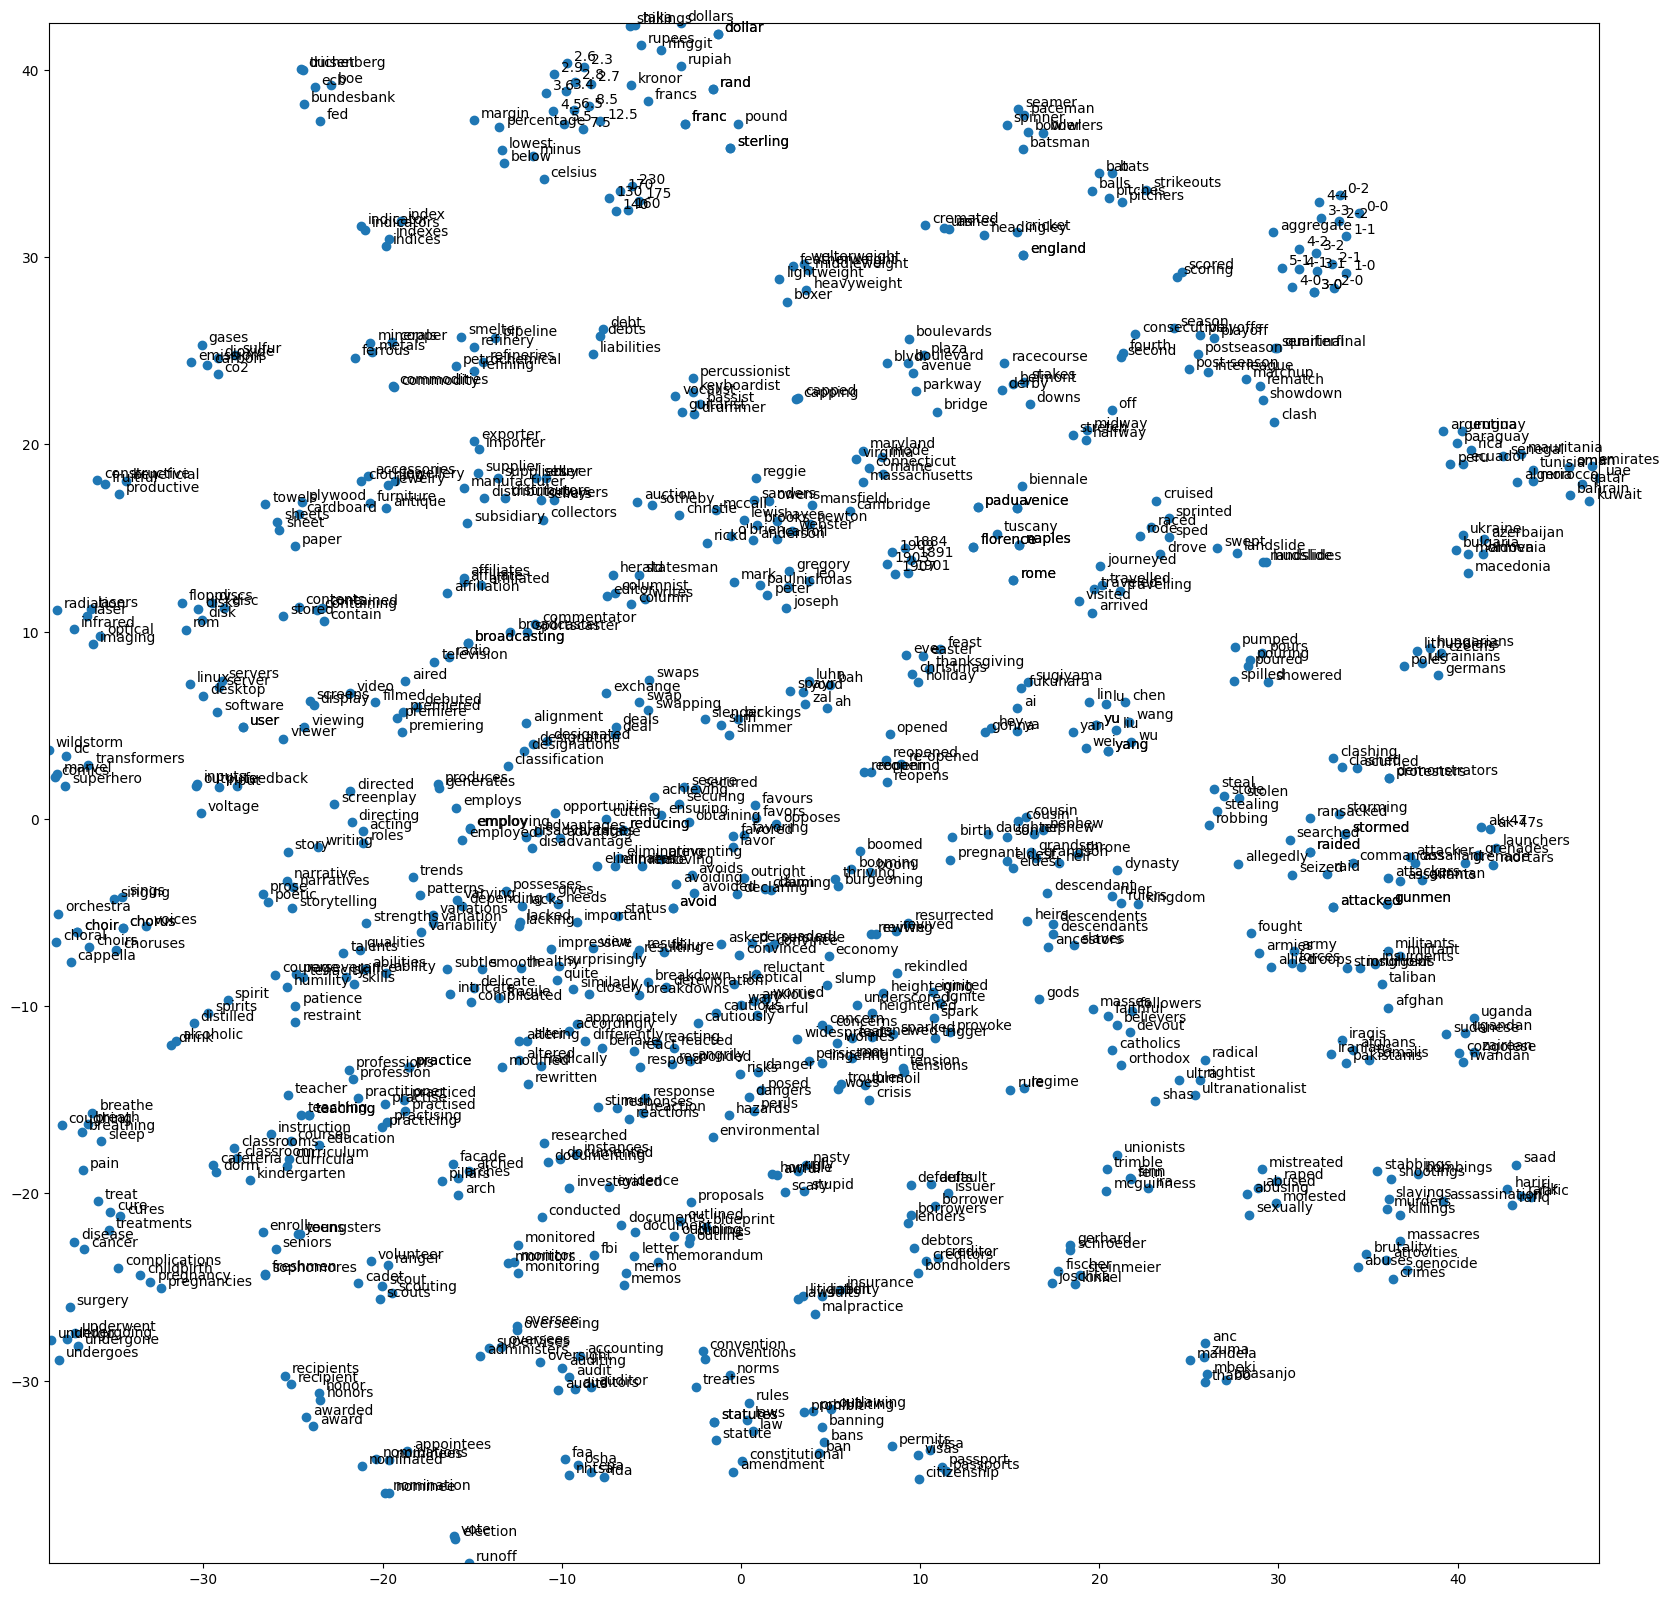

In [12]:
from gensim.utils import simple_preprocess

all_words = list(model.index_to_key)
words = all_words[8000 : 8150]

plot_closest_tsne(model, words)

In [5]:
import nltk
import string

labels = model.index_to_key
vecs = [model[lb] for lb in labels]
# download stopwords corpus
nltk.download('stopwords')

# get the list of stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

projection_data = [(label, vector) for label, vector in zip(labels, vecs) if label not in stopwords and label not in punctuation][:200]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/divyan-18871/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from utils import create_projection

create_projection(projection_data, path='./tf-meta/gloveMeta')

2023-08-24 17:20:03.204471: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 17:20:03.233140: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 17:20:03.289354: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 17:20:03.290142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 17:20:03.872537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2023-08-24 17:20:05.194128: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 17:20:05.195728: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 17:20:05.226551: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 17:20:05.226896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 17:20:05.689574: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co